<a href="https://colab.research.google.com/github/furkanuyanik/churn-analysis/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

In [0]:
data = pd.read_csv('./churn.csv', header = 0)
data = data.dropna();

customerId = data['customerID']
del data['customerID']

In [0]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'MultipleLines' ];

for item in yes_no_columns:
    data[item].replace(to_replace='Yes', value=1, inplace=True);
    data[item].replace(to_replace='No',  value=0, inplace=True);
    data[item].replace(to_replace='No phone service',  value=0, inplace=True);
    data[item].replace(to_replace='No internet service',  value=0, inplace=True);

empty_columns = ['TotalCharges'];

for column in empty_columns:
    data[column].replace(to_replace=' ', value=np.nan, inplace=True);
    data = data.dropna(axis=0, subset=[column])

data["TotalCharges"] = data["TotalCharges"].astype(float)
data['PaymentMethod']=np.where(data['PaymentMethod'] == 'Bank transfer (automatic)', 'Basic', data['PaymentMethod'])
data['PaymentMethod']=np.where(data['PaymentMethod'] == 'Credit card (automatic)', 'Basic', data['PaymentMethod'])

In [0]:
numeric_data = pd.get_dummies(data)
numeric_data.fillna(value=0, inplace=True)

In [0]:
df = pd.DataFrame(numeric_data)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [0]:
# customerID: Müşteri Kimliği
# gender: Cinsiyet
# SeniorCitizen: Yaşlı mı?
# Partner: ?
# Dependents: ?
# tenure: Kullanım Süresi
# PhoneService: Telefon Hizmeti
# MultipleLines: ? (Sanırım konferans yapabiliyor mu?)
# InternetService: İnternet Servisi
# OnlineSecurity: Çevrimiçi Güvenlik Hizmeti
# OnlineBackup: Çevrimiçi Yedekleme Hizmeti
# DeviceProtection: Cihaz Koruma Hizmeti
# TechSupport: Teknik Destek
# StreamingTV: TV Hizmeti
# StreamingMovies: Film Hizmeti
# Contract: Sözleşme
# PaperlessBilling: E-Fatura Hizmeti
# PaymentMethod: Ödeme Şekli
# MonthlyCharges: Aylık Ücret
# TotalCharges: Toplam Ücret
# Churn: Çıktı

for column in numeric_data.columns:
  print("Column: ", column, numeric_data[column].value_counts().keys().tolist())

In [0]:
for column in numeric_data.columns.tolist():
  print("Column: ", column, "\n\n", numeric_data.groupby(column).mean(), "\n\n\n\n")

In [0]:
X = numeric_data.loc[:, numeric_data.columns != 'Churn']
y = numeric_data.loc[:, numeric_data.columns == 'Churn']

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning

[ True False  True  True  True  True  True  True False  True  True  True
  True False False False  True  True  True  True  True False  True  True
  True  True]
[1 3 1 1 1 1 1 1 6 1 1 1 1 5 7 2 1 1 1 1 1 4 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
cols=['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'gender_Male', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Basic', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
X=os_data_X[cols]
y=os_data_y['Churn']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.469928
         Iterations: 35
                                        Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.322    
Dependent Variable:           Churn                      AIC:                        6820.0054
Date:                         2020-03-27 20:00           BIC:                        6950.8025
No. Observations:             7216                       Log-Likelihood:             -3391.0  
Df Model:                     18                         LL-Null:                    -5001.8  
Df Residuals:                 7197                       LLR p-value:                0.0000   
Converged:                    0.0000                     Scale:                      1.0000   
No. Iterations:               35.0000                                                         
----------------------------------------------------------------------------------------------
                        

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
cols=['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'gender_Male', 'Contract_Month-to-month', 'Contract_Two year']
X=os_data_X[cols]
y=os_data_y['Churn']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.496826
         Iterations 7
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.283    
Dependent Variable:     Churn              AIC:                7198.1947
Date:                   2020-03-27 20:02   BIC:                7294.5714
No. Observations:       7216               Log-Likelihood:     -3585.1  
Df Model:               13                 LL-Null:            -5001.8  
Df Residuals:           7202               LLR p-value:        0.0000   
Converged:              1.0000             Scale:              1.0000   
No. Iterations:         7.0000                                          
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
SeniorCitizen            0.5310   0.0849   6.2525 0

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74      1064
           1       0.74      0.82      0.78      1101

    accuracy                           0.76      2165
   macro avg       0.76      0.76      0.76      2165
weighted avg       0.76      0.76      0.76      2165



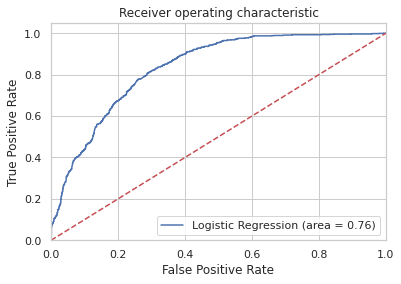

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()